In [1]:
import sympy as sy
sy.init_printing()

In [2]:
from sympy import symbols

# Tarea 8
### Cosmo with sympy 

In [3]:
#from sympy.abc import x,t
from sympy import integrate
from sympy import Eq
from sympy import Function
from sympy import simplify
from sympy import Q

## 1. Compute the integral $$t=\frac{1}{H_0}\int_0^a \left[\frac{x}{\sqrt{\Omega_{r,0}+(1-\Omega_{r,0})x^2}}\right]dx$$

i.e. radiation-only Universe

### a) $\Omega_{r,0}>1$

In [4]:
x,t,a= symbols('x t a')
H0= symbols('H_0', positive=True)
Omr_pos = symbols('\\Omega_{r0}',positive=True)

La función:

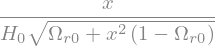

In [5]:
e1=(1/H0)*(x/sy.sqrt(Omr_pos+(1-Omr_pos)*x**2))
e1

Integramos de $0$ a $a$

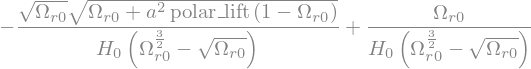

In [6]:
r1=integrate(e1,(x,0,a))
r1

Con sy.refine hacemos que $\Omega_{r,0}-1>0$ i.e $\Omega_{r,0}>1$, sin embargo el polar_lift no se va :(

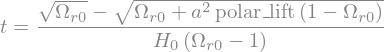

In [7]:
e11=Eq(sy.refine(r1,Q.positive(Omr_pos-1)),t)
simplify(e11)

Despejamos $a(t)$

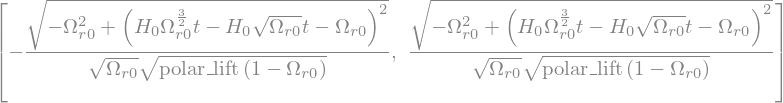

In [8]:
sy.solve(e11,a)

### b) $\Omega_{r,0}<1$

In [9]:
Omr_neg = sy.symbols('\\Omega_{r0}',negative=True)

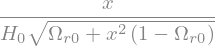

In [10]:
e2=(1/H0)*(x/sy.sqrt(Omr_neg+(1-Omr_neg)*x**2))
e2

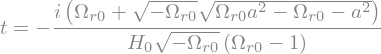

In [11]:
r2=integrate(e2,(x,0,a))
e22=Eq(sy.refine(r2,Q.negative(Omr_pos-1)),t) #con refine hacemos que Omegar0-1<0 i.e Omegar0<1
simplify(e22)

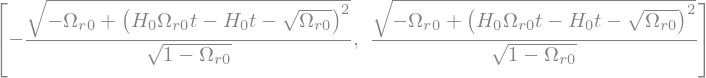

In [12]:
r22=sy.solve(e22,a)
r22

## 2. Compute $$t=\frac{1}{H_0}\int_0^a \left[\frac{x}{\sqrt{\Omega_{m,0}x+(\Omega_{r,0})}}\right]dx$$

i.e. spatially-flat Friedmann model ($\Omega_{\Lambda,0}=0$,$\Omega_{m,0}+\Omega_{r,0}=1$)

In [41]:
x,y,t,a= symbols('x y t a')
H0= symbols('H_0', positive=True)
OmRad, OmMat = symbols('\\Omega_{r0} \\Omega_{m0}', positive=True)

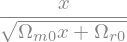

In [42]:
e3=(x/sy.sqrt((OmMat*x)+OmRad))
simplify(e3)

Según [Hobson, 2006, p. 403], es conveniente hacer el cambio de variable: $$y=\Omega_{m,0}x+\Omega_{r,0}$$

De manera que $$x=\frac{y-\Omega_{r,0}}{\Omega_{m,0}}$$ y $$dx=\frac{1}{\Omega_{m,0}}dy$$

Nos queda entonces: $$H_0 t=\frac{1}{\Omega_{m,0}^2}\int_0^a \left[\frac{y-\Omega_{r,0}}{\sqrt{y}}\right]dy=\frac{1}{\Omega_{m,0}^2}\int_0^a \left[y^{1/2}-\Omega_{r,0}y^{-1/2}\right]dy$$

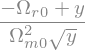

In [43]:
e3=(1/Omm**2)*((y/sy.sqrt(y))-(OmRad/sy.sqrt(y)))
simplify(e3)

Ahora, para saber los límites de integración, sabemos que, en general, la 1a ec. de Friedmann nos dice: $$H^2(a)=H_0^2\left[\Omega_{r,0}a^{-4}+\Omega_{m,0}a^{-3}+\Omega_{k,0}a^{-2}+\Omega_{\Lambda,0}\right]$$

Con las condiciones que tenemos entonces $$\frac{H^2(a)}{H_0^2}= a^{-4}\left[\Omega_{r,0}+\Omega_{m,0}a\right]$$

De manera que $$\frac{H(a)}{H_0}=a^2{\sqrt{\Omega_{r,0}+\Omega_{m,0}a}}$$

La integral indefinida:

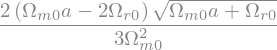

In [44]:
r3=integrate(e3,(y,0,(OmRad+OmMat*a)))
simplify(r3)

Ahora, evaluando en el intervalo (0,a), obtenemos la expresión para $H_0 t$

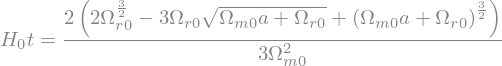

In [17]:
e33=Eq(r3-r3.subs(a,0),H0*t) 
sy.simplify(e33)

---------------------------------

## 3. Compute $$t=\frac{1}{H_0}\int_0^a\sqrt{\frac{x}{(1-\Omega_{\Lambda,0})+\Omega_{\Lambda,0}x^3}}dx$$

i.e. spatially-flat Friedmann model

Usando el cambio de variable $y^2 = x^3 |\Omega_\Lambda|/(1-\Omega_\Lambda)$ sugerido por [Hobson, 2006, p.406] llegamos a $$x = \sqrt[3]{\frac{1-\Omega_\Lambda}{|\Omega_\Lambda|}} y ^{2/3}$$, $$dx = \frac{2}{3\sqrt{x}}\sqrt{\frac{1-\Omega_\Lambda}{\Omega_\Lambda}}$$. Sustituyendo adecuadamente se llega a la integral mucho más sencilla: $$H_0t = \frac{2}{3\sqrt{|\Omega_\Lambda|}} \int_{0}^{\sqrt{a^3\frac{|\Omega_\Lambda|}{1-\Omega_\Lambda} }} \frac{dy}{\sqrt{1\pm y^2}}$$ el signo positivo corresponde a $\Omega_\Lambda > 0$ y el signo negativo a $\Omega_\Lambda < 0$, integramos

In [45]:
OmLambda=symbols('\\Omega_{\\Lambda}')

Caso positivo

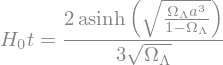

In [46]:
res_pos=integrate(1/sy.sqrt(1+y**2),(y,0,sy.sqrt(a**3*(OmLambda/(1-OmLambda)))))
sy.Eq(H0*t,(res_pos*(2/(3*sy.sqrt(OmLambda)))))

Caso negativo

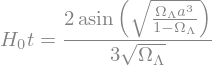

In [47]:
res_neg=integrate(1/sy.sqrt(1-y**2),(y,0,sy.sqrt(a**3*(OmLambda/(1-OmLambda)))))
sy.Eq(H0*t,(res_neg*(2/(3*sy.sqrt(OmLambda)))))

## 4. Components of Universe are perfect, barotropic fluids

### a) Show that the continuity eqs. can be written as a dynamical system with the following form: 


$$\Omega_i^\prime = 3(\Pi-\gamma_i)\Omega_i$$

Primero, la ecuación de estado para fluidos barotrópicos se define como $$P_i=(\gamma_i-1)\rho_i c^2$$

Con $\gamma_i$ para describir cada fluido (4/3 para radiación, 1 para materia y 0 para constante cosmológica)

Sabemos que la ecuación de continuidad está definida también por:

$$\dot{\rho}+3H(\rho+\frac{P}{c^2})=0$$

Sustituimos la ec. de estado barotrópica en la ec. de continuidad y:

$$\dot{\rho}+3H(\rho+(\gamma-1)\rho)=0$$
$$\dot{\rho}+3H(\rho\gamma)=0$$

Entonces

$$\dot{\rho_i}=-3H(\rho_i\gamma_i)$$

Para sustituir esta última expresión en la expresion de $\Omega_i = \frac{\kappa_0}{3H^2}\rho_i$, derivemos ésta última expresión con respecto al tiempo:

$$\dot{\Omega_i}=\frac{d}{dt}\left(\frac{\kappa_0}{3H^2}\rho_i\right)$$

$$\dot{\Omega_i}=\frac{\kappa_0}{3H^2}\dot{\rho_i}+\frac{\kappa_0\rho_i}{3}(-2H^{-1}\dot{H})=\frac{\kappa_0}{3H}\left(\frac{\dot{\rho_i}}{H}-2\rho_i\dot{H}\right)$$

Sustituimos $\dot{\rho_i}$ en la expresión anterior, entonces

$$\dot{\Omega_i}=\frac{\kappa_0}{3H}\left( -3\rho_i\gamma_i -2\rho_i\dot{H} \right)$$

factorizamos el $\rho_i$ y, fuera del paréntesis tendremos $$\frac{\kappa_0\rho_i}{3H}=\Omega_i H$$ 

$$\dot{\Omega_i}=\Omega_i H (-3\gamma_i-2\dot{H})=3\Omega_i \left(-\gamma_i H-\frac{2\dot{H}H}{3}\right)$$

#### Paréntesis 

--------------------------------

Sabemos que $\dot{H}H=\left(\frac{da}{dt}\frac{1}{a}\right) \frac{d}{dt}\left(\frac{da}{dt}\frac{1}{a}\right)$

Además, sabemos que 

$$\int\frac{du}{u}=ln(u)+C$$

entonces,

$$\frac{du}{u}=dln(u)$$

Para el caso del factor de escala tenemos entonces,

$$H=\frac{da}{dt}\frac{1}{a}=\frac{dln(a)}{dt}\equiv \frac{d(N)}{dt}$$


Por ello, la derivada con respecto del parámetro de e-folding es

$$\frac{d}{dN}=\frac{d}{dt}\frac{1}{H}$$

Así que $$\frac{d}{dN}\Omega_i=\frac{1}{H}\frac{d}{dt}\Omega_i=\frac{\dot{\Omega_i}}{H}$$

--------------------------

Aplicando esa última igualdad a la ecuación obtenida de $\dot{\Omega_i}$,

$$\frac{d}{dN}\Omega_i=\frac{\dot{\Omega_i}}{H}=3\Omega_i\left(-\gamma_i -\frac{2\dot{H}}{3} \right)$$

Finalmente, obtenemos el sistema dinámico:

$$\frac{d}{dN}\Omega_i=\Omega_i^{\prime}=3\Omega_i\left(-\gamma_i + \Sigma\Omega_i\gamma_i \right)=3\Omega_i\left(\Pi-\gamma_i \right)$$

Con $$\Pi=\Sigma\Omega_i\gamma_i$$

### b) Show that Friedmann equation becomes a constraint for density parameters $\forall t$, $\Sigma_i \Omega_i = 1$

Tomamos la ecuación de Friedmann $$H(a)^2=\frac{8\pi G}{3}\rho(a)-\frac{k}{a^2}$$

Y la definición de densidad crítica en términos del corrimiento al rojo: $$\rho_c(a)=\frac{3H(a)^2}{8\pi G}$$

Y dividimos la primera por la segunda:

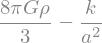

In [48]:
G,k,rho,rho_c,H= symbols('G k \\rho \\rho_c H')
eq1=8*sy.pi*G/3 * rho - (k/a**2)          #esto es igual a H0^2
eq1

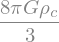

In [49]:
eq2=(8*sy.pi*G*rho_c)/3                   #esto es igual a H0^2 también
eq2

Al dividir la ec. de Friedmann por $\rho_c(a)$ en términos de $H_0^2$ nos queda $1$ del lado izquierdo:

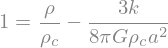

In [50]:
eq3=Eq(1,simplify(eq1/eq2))
eq3

Por la definición de $\rho_c$ notamos que $3/8\pi G\rho_c=1/H^2$

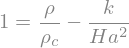

In [51]:
eq4=eq3.subs(3/(8*sy.pi*G*rho_c),1/H)
eq4

Y por la definición de densidad física de una especie x: $$\Omega(a)_x\equiv \frac{\rho(a)_x}{\rho_c(a)_x}$$

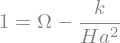

In [52]:
Omega,Omegak = symbols('\\Omega \\Omega_k')
eq1=eq4.subs(rho/rho_c,Omega)
eq1

y como $$\Omega_k\equiv-\frac{k}{H(a)a^2}$$

In [96]:
eq2=eq1.subs(-k/(H*a**2),Omegak)
eq2

y como $\Omega$ se refiere a la suma de todas las especiese/fluidos cosmológicos tenemos que la suma de densidades físicas es igual a 1 $\forall a$

### c) Solve dynamical system and plot with 

$\Omega_{r,0}=10^{-4}$, $\Omega_{m,0}=0.3$, $\Omega_{k,0}=-0.01$, $H_0=68 \text{km s^{-1}Mpc}$ and cosmological constant. 

Usando la condición de constricción $$\Sigma \Omega_i=1$$

In [103]:
OmR = 1e-4 
OmM = 0.3
OmK = -0.01
OmL = 1-(OmR+OmM+OmK)
H0 = 68

gR=4./3.
gM=1.
gL=0.

print('\Omega_{\Lambda}=',OmL)

\Omega_{\Lambda}= 0.7099


Sistema de ecuaciones (usaremos el sistema dinámico):

$$\frac{d}{dN}\Omega_i=\Omega_i^{\prime}=3\Omega_i\left(-\gamma_i + \Sigma\Omega_i\gamma_i \right)$$

con $dN=dln(a)$

In [122]:
from sympy import dsolve, Derivative

Pi=(OmR*gR)+(OmM*gM)+(OmL*gL)
a,N = symbols('a N')

#radiación
OmR_f=Function('\\Omega_m')
eq1=Eq(Derivative(OmR_f(a),N),3*OmR_f(a)*(Pi-gR))

#materia
OmM_f=Function('\\Omega_m')
eq2=Eq(Derivative(OmR_f(a),N),3*OmM_f(a)*(Pi-gM))

#radiación
OmL_f=Function('\\Omega_{\Lambda}')
eq3=Eq(Derivative(OmL_f(a),N),3*OmL_f(a)*(Pi-gL))


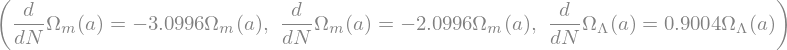

In [123]:
(eq1,eq2,eq3)

In [120]:
dsolve(eq1,OmR_f(a),ics{a=1})

SyntaxError: invalid syntax (1772249287.py, line 1)

## ¡¡Ayuda!!
No pude resolver, me costó mucho trabajo expresar la ecuación diferencial en términos de a, ya que está en términos de N=ln(a) y dsolve no resuelve con respecto a ln. por otro lado si d/dN = d/dt 1/H, no sé qué hacer con el d/dt


Hay otra forma de obtener los plots, aunque sé que el problema no lo pedía así (tomado de un workshop de cosmo con python):

In [127]:
# Parametro de Hubble normalizado E(z) = H(z)/H_0
def Ez_LCDM(z):
    ez = np.sqrt(OmCDM*(1+z)**3 + OmB*(1+z)**3 + OmR*(1+z)**4 + OmDE)
    return ez

def OmegaDEz_LCDM(z):
  omde = OmDE/Ez_LCDM(z)**2
  return omde

def OmegaRz_LCDM(z):
  omcdm = OmR*(1+z)**4/Ez_LCDM(z)**2
  return omcdm 

def OmegaBz_LCDM(z):
    omb = OmB*(1+z)**3/Ez_LCDM(z)**2
    return omb

def OmegaCDMz_LCDM(z):
    omcdm = OmCDM*(1+z)**3/Ez_LCDM(z)**2
    return omcdm

def OmegaMz_LCDM(z):
    omm = OmegaCDMz_LCDM(z) + OmegaBz_LCDM(z)
    return omm

# Planck constraints 2018 -- arXiv:1807.06209
OmCDM,OmB,OmR = 0.265, 0.05,5.047e-5 
OmDE = 1 - (OmCDM + OmB + OmR)
H0 = 67.27 # km/s/Mpc
OmM = OmCDM + OmB

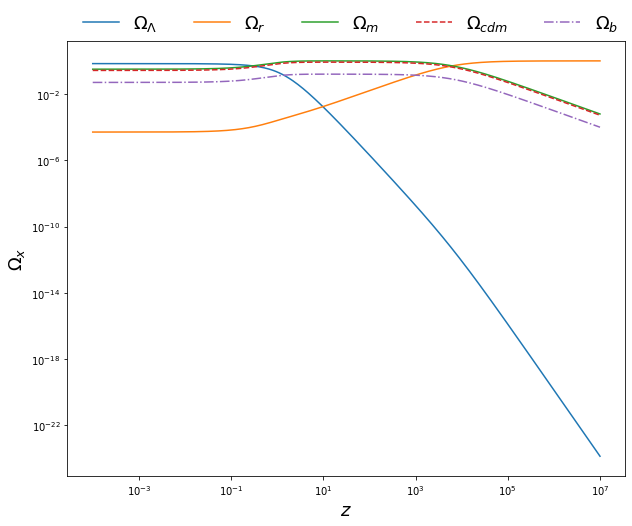

In [129]:
z_to_plot = np.logspace(-4,7.,300)

fig, ax = plt.subplots(1,1,figsize=(10,8))

#ax.axvspan(z_r_m,1e7,color='orange',alpha=0.3)
#ax.axvspan(z_m_de,z_r_m,color='green',alpha=0.3)
#ax.axvspan(1e-4,z_m_de,color='blue',alpha=0.3)

ax.loglog(z_to_plot,OmegaDEz_LCDM(z_to_plot),label=r'$\Omega_{\Lambda}$')
ax.loglog(z_to_plot,OmegaRz_LCDM(z_to_plot),label=r'$\Omega_{r}$')
ax.loglog(z_to_plot,OmegaMz_LCDM(z_to_plot),label=r'$\Omega_{m}$')
ax.loglog(z_to_plot,OmegaCDMz_LCDM(z_to_plot),'--',label=r'$\Omega_{cdm}$')
ax.loglog(z_to_plot,OmegaBz_LCDM(z_to_plot),'-.',label=r'$\Omega_{b}$')

ax.set_xlabel(r'$z$',fontsize=18)
ax.set_ylabel(r'$\Omega_x$',fontsize=18)
ax.legend(ncol=5, borderaxespad=0.,bbox_to_anchor=(1., 1.08),frameon=False,fontsize=18)

### d) Deceleration parameter

In [133]:
# parametro de desaceleracion
def qz_LCDM(z):
    qz = 0.5*(OmegaMz_LCDM(z) + 2*OmegaRz_LCDM(z) - 2*OmegaDEz_LCDM(z))
    return qz

# redshift de transicion de q > 0 ----> q < 0
from scipy import optimize
z_trans = optimize.root_scalar(qz_LCDM,bracket=[0.5,1.5])

Text(0, 0.5, '')

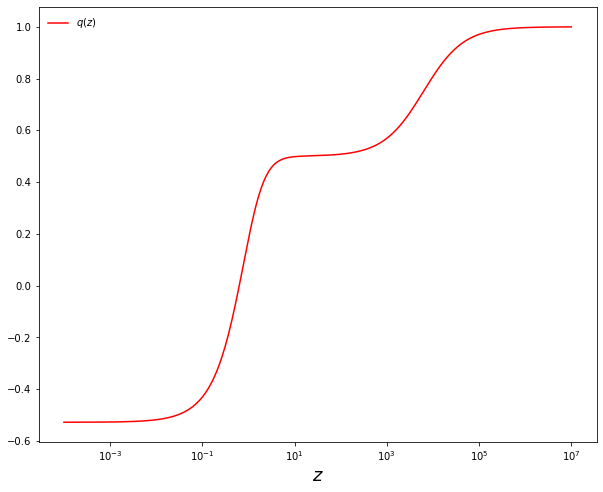

In [135]:
z_to_plot = np.logspace(-4,7.,300)

fig, ax = plt.subplots(1,1,figsize=(10,8))

#ax.axhline(0.,color='red',ls='--')
#ax.axhline(-1./3.,color='k',ls='--')

#ax.axvline(z_trans.root,color='gray',ls='--')

ax.semilogx(z_to_plot,qz_LCDM(z_to_plot),color='red',label=r'$q(z)$')

ax.legend(loc=0,frameon=False)

ax.set_xlabel(r'$z$',fontsize=18)
ax.set_ylabel(r'',fontsize=18)

## 5. Plot of comoving, luminosity and angular diameter distances

In [54]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
import scipy.integrate
sp_int=scipy.integrate

In [94]:
# Contenido energético al día de hoy y constantes de Hubble 
OmR = 1e-4 
OmM = 0.3
OmK = -0.01
OmL = 1-(OmR+OmM+OmK)
H0 = 68                  # km/s/Mpc

La ecuación de Friedmann para un Universo con curvatura arbitraria, en términos de los parámetros físicos $\Omega_i$ es: 

$$H(a)^2=H_0^2\left[\Omega_r^0 a^{-4}+\Omega_m^0 a^{-3}+\Omega_k^0 a^{-2}+\Omega_{\Lambda}^0\right]$$

$$H(a)^2=H_0^2\left[\Omega_r^0 (1+z)^{4}+\Omega_m^0 (1+z)^{3}+\Omega_k^0 (1+z)^{2}+\Omega_{\Lambda}^0\right]$$


In [76]:
# Parametro de Hubble normalizado E(z) = H(z)/H_0
def Hz(z):
    Hz = H0*(np.sqrt(OmR*(1+z)**4 + OmM*(1+z)**3 + OmK*(1+z)**2 + OmL))
    return Hz

In [83]:
c_const = sp.constants.c*1e-3

# R function:
R0 = 1/(H0*np.sqrt(np.abs(OmK)))

# comoving distance
def Cd(z):
    chi = lambda z: (c_const/R0)*(1/Hz(z))
    d1 = sp_int.quad(chi,0.,z)[0]
    return d1
Cd = np.vectorize(Cd)

# luminosity distance
def Ld(z):
    d2 = (1+z)*Cd(z)
    return d2

# angular diameter distance
def ADd(z):
    d3 = Cd(z)/(1+z)
    return d3

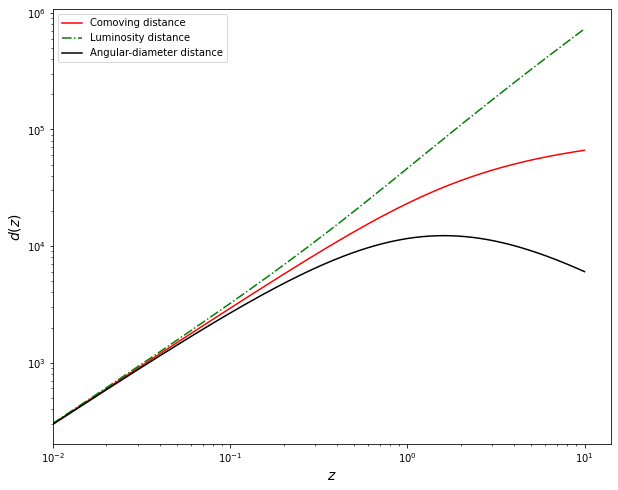

In [95]:
z_range = np.arange(0.,10.,0.01)

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(z_range,Cd(z_range),'r-',label='Comoving distance')
ax.plot(z_range,Ld(z_range),'g-.',label='Luminosity distance')
ax.plot(z_range,ADd(z_range),'k',label='Angular-diameter distance')

ax.legend()
ax.set_xlabel(r'$z$', fontsize=14)
ax.set_ylabel(r'$d(z)$',fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0.01)